In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use("dark_background")

dark_bg = "#1a1a1a"
dark_grid = "#333333"
green_up = "#00cc66"
red_down = "#ff4444"

mpl.rcParams["figure.facecolor"] = dark_bg
mpl.rcParams["axes.facecolor"] = dark_bg
mpl.rcParams["savefig.facecolor"] = dark_bg
mpl.rcParams["axes.edgecolor"] = dark_grid
mpl.rcParams["axes.labelcolor"] = "white"
mpl.rcParams["xtick.color"] = "white"
mpl.rcParams["ytick.color"] = "white"

In [3]:
nvda = yf.Ticker("NVDA")
df = nvda.history(period="10y", interval="1d", auto_adjust=False, actions=False)
df = df.dropna(subset=["Open","High","Low","Close","Volume"]).copy()
df.index = pd.to_datetime(df.index)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-11-04 00:00:00-05:00,203.000000,203.970001,197.929993,198.690002,198.690002,188919300
2025-11-05 00:00:00-05:00,198.770004,202.919998,194.649994,195.210007,195.210007,171350300
2025-11-06 00:00:00-05:00,196.419998,197.619995,186.380005,188.080002,188.080002,223029800
2025-11-07 00:00:00-05:00,184.899994,188.320007,178.910004,188.149994,188.149994,264204000
2025-11-10 00:00:00-05:00,195.110001,199.940002,193.789993,199.050003,199.050003,197408546


In [16]:
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()
df["MA200"] = df["Close"].rolling(200).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index, y=df["Close"],
    mode="lines", name="Close",
    line=dict(color="white", width=2)
))

fig.add_trace(go.Scatter(
    x=df.index, y=df["MA20"],
    mode="lines", name="MA20",
    line=dict(color="#00ff66", width=2)
))

fig.add_trace(go.Scatter(
    x=df.index, y=df["MA50"],
    mode="lines", name="MA50",
    line=dict(color="#ff9933", width=2)
))

fig.add_trace(go.Scatter(
    x=df.index, y=df["MA200"],
    mode="lines", name="MA200",
    line=dict(color="#cc33ff", width=2)
))

fig.update_layout(
    title="NVDA Price vs 20, 50, 200 MA",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()


In [24]:
# PHASE 1 — Steady Growth (2016–Feb 2020)
phase1 = df.loc["2016-01-01":"2020-02-29"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=phase1.index, y=phase1["Close"],
    mode="lines", name="Close",
    line=dict(color="white", width=2)
))
fig.add_trace(go.Scatter(
    x=phase1.index, y=phase1["MA20"],
    mode="lines", name="MA20",
    line=dict(color="#00ff66", width=2)
))
fig.add_trace(go.Scatter(
    x=phase1.index, y=phase1["MA50"],
    mode="lines", name="MA50",
    line=dict(color="#ff9933", width=2)
))
fig.add_trace(go.Scatter(
    x=phase1.index, y=phase1["MA200"],
    mode="lines", name="MA200",
    line=dict(color="#cc33ff", width=2)
))

fig.update_layout(
    title="Phase 1 — NVDA Moving Averages (2016–Feb 2020)",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()


In [19]:
fig = go.Figure(data=[
    go.Candlestick(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
        increasing=dict(line=dict(color=green_up), fillcolor=green_up),
        decreasing=dict(line=dict(color=red_down), fillcolor=red_down),
        opacity=0.9
    )
])

fig.update_layout(
    title="NVDA — Daily Candlestick Chart",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white"),
    xaxis=dict(
        rangeslider=dict(visible=False),
        autorange=True
    ),
    yaxis=dict(autorange=True)
)

fig.show()


In [25]:
# PHASE 2 — COVID Boom and Pullback (Mar 2020–Oct 2022)
phase2 = df.loc["2020-03-01":"2022-10-31"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=phase2.index, y=phase2["Volatility20"],
    mode="lines", name="20d Annualized Volatility",
    line=dict(color=red_down, width=2)
))

fig.update_layout(
    title="Phase 2 — NVDA Volatility (Mar 2020–Oct 2022)",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()


In [21]:
df["Returns"] = df["Close"].pct_change()
df["Volatility20"] = df["Returns"].rolling(20).std() * np.sqrt(252)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index, y=df["Volatility20"],
    mode="lines", name="20d Annualized Volatility",
    line=dict(color=red_down, width=2)
))

fig.update_layout(
    title="NVDA Volatility Chart",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()

In [27]:
# PHASE 3 — AI Boom (Nov 2022–Present)
phase3_nvda = df.loc["2022-11-01":].copy()
phase3_spy = spy.loc["2022-11-01":].copy()

nvda_ret = phase3_nvda["Close"].pct_change().dropna()
spy_ret = phase3_spy.dropna()

nvda_cum = (1 + nvda_ret).cumprod()
spy_cum = (1 + spy_ret).cumprod()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=nvda_cum.index, y=nvda_cum,
    mode="lines", name="NVDA", line=dict(color=green_up, width=2)
))
fig.add_trace(go.Scatter(
    x=spy_cum.index, y=spy_cum,
    mode="lines", name="SPY", line=dict(color=red_down, width=2)
))

fig.update_layout(
    title="Phase 3 — Cumulative Returns: NVDA vs SPY (Nov 2022–Present)",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()


In [22]:
spy = yf.Ticker("SPY").history(period="10y", interval="1d")
spy = spy["Close"].pct_change().dropna()

nvda_ret = df["Close"].pct_change().dropna()

nvda_cum = (1 + nvda_ret).cumprod()
spy_cum = (1 + spy).cumprod()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=nvda_cum.index, y=nvda_cum,
    mode="lines", name="NVDA", line=dict(color=green_up, width=2)
))
fig.add_trace(go.Scatter(
    x=spy_cum.index, y=spy_cum,
    mode="lines", name="SPY", line=dict(color=red_down, width=2)
))

fig.update_layout(
    title="Cumulative Returns: NVDA vs SPY",
    paper_bgcolor=dark_bg,
    plot_bgcolor=dark_bg,
    font=dict(color="white")
)

fig.show()

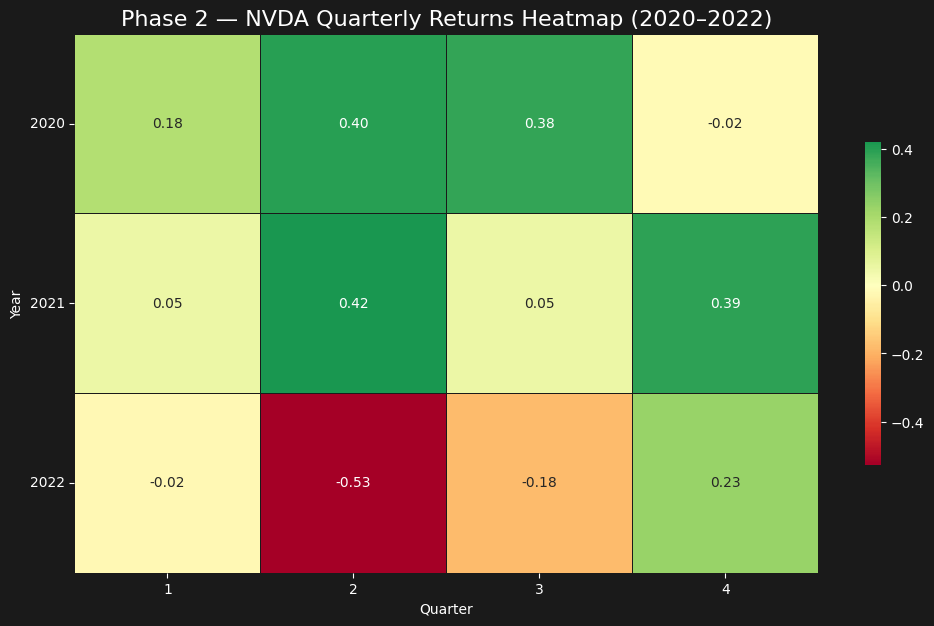

In [26]:
# PHASE 2 HEATMAP — NVDA Quarterly Returns (2020–2022)
heatmap_df = df.loc["2020-01-01":"2022-12-31"].copy()
heatmap_df["Returns"] = heatmap_df["Close"].pct_change()

heat = heatmap_df.resample("Q")["Returns"].sum().to_frame()
heat["Year"] = heat.index.year
heat["Quarter"] = heat.index.quarter
heat = heat.pivot(index="Year", columns="Quarter", values="Returns")

plt.figure(figsize=(12,7))
sns.heatmap(
    heat, cmap="RdYlGn", center=0, annot=True, fmt=".2f",
    linewidths=0.5, linecolor="#1a1a1a", cbar=True,
    cbar_kws={"shrink": 0.6}
)
plt.title("Phase 2 — NVDA Quarterly Returns Heatmap (2020–2022)", color="white", fontsize=16)
plt.xlabel("Quarter", color="white")
plt.ylabel("Year", color="white")
plt.xticks(color="white")
plt.yticks(color="white", rotation=0)
plt.show()


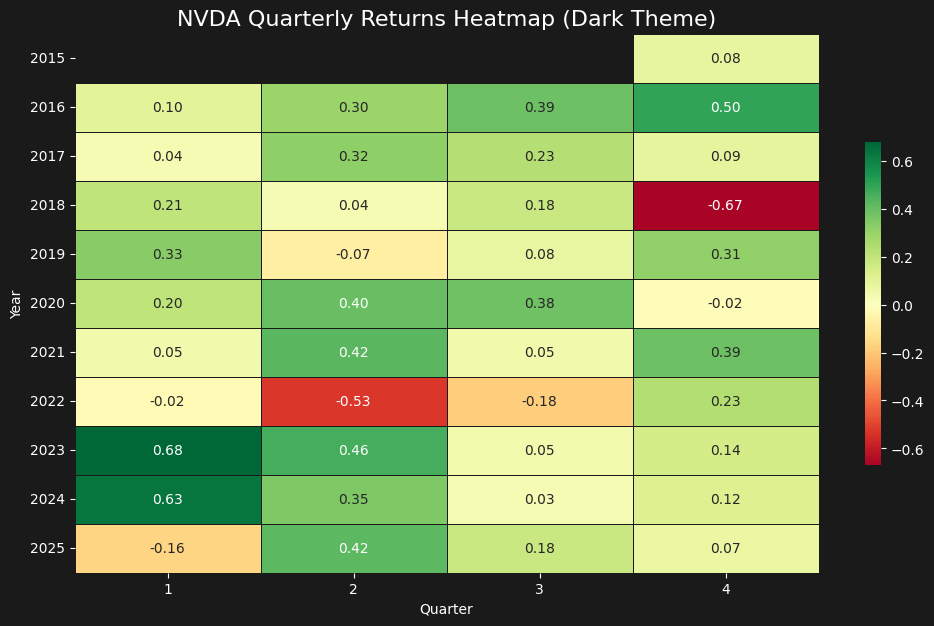

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

heat = df.resample("Q")["Returns"].sum().to_frame()
heat["Year"] = heat.index.year
heat["Quarter"] = heat.index.quarter
heat = heat.pivot(index="Year", columns="Quarter", values="Returns")

plt.figure(figsize=(12,7))
sns.heatmap(
    heat,
    cmap="RdYlGn",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="#1a1a1a",
    cbar=True,
    cbar_kws={"shrink": 0.6}
)

plt.title("NVDA Quarterly Returns Heatmap (Dark Theme)", color="white", fontsize=16)
plt.xlabel("Quarter", color="white")
plt.ylabel("Year", color="white")
plt.xticks(color="white")
plt.yticks(color="white", rotation=0)
plt.show()
